In [9]:
import numpy as np
import pandas as pd

# Seed for reproducibility
np.random.seed(42)

# Number of data points
n = 1000

# Mean vector (5-dimensional, centered at 0)
mean = np.zeros(5)

# Covariance matrix (symmetric & positive definite)
# You can customize this structure
cov = np.array([
    [1.0, 0.8, 0.3, 0.2, 0.1],
    [0.8, 1.0, 0.4, 0.3, 0.2],
    [0.3, 0.4, 1.0, 0.5, 0.3],
    [0.2, 0.3, 0.5, 1.0, -0.6],
    [0.1, 0.2, 0.3, -0.6, 1.0]
])

# Generate 100 samples from the multivariate normal
data = np.random.multivariate_normal(mean, cov, size=n)

contaminated_value = 999

contaminated_data = data.copy()
contaminated_data[0, 0] = contaminated_value

print(data.shape)


(1000, 5)


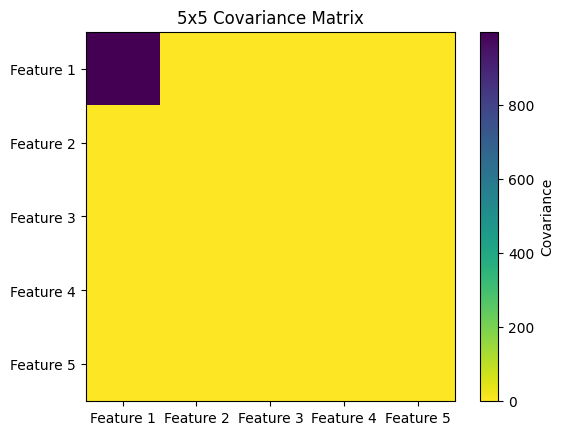

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Compute covariance matrix (features should be columns)
cov_matrix = np.cov(contaminated_data, rowvar=False)  # shape (5, 5)

# Plot covariance matrix as a heatmap
plt.imshow(cov_matrix, cmap='viridis_r', interpolation='nearest')
plt.colorbar(label='Covariance')
plt.title("5x5 Covariance Matrix")
plt.xticks(range(5), [f'Feature {i+1}' for i in range(5)])
plt.yticks(range(5), [f'Feature {i+1}' for i in range(5)])
plt.show()


In [ ]:
import numpy as np
from sklearn.covariance import MinCovDet

# Assuming contaminated_data is your (100, 5) NumPy array
# Run Minimum Covariance Determinant
mcd = MinCovDet(support_fraction=None).fit(contaminated_data)

# Get robust location (mean)
robust_location = mcd.location_

# Get robust covariance matrix
robust_covariance = mcd.covariance_

# Get Mahalanobis distances (useful for outlier detection)
mahalanobis_dist = mcd.mahalanobis(contaminated_data)

print("Robust location (mean):\n", robust_location)
print("Robust covariance matrix:\n", robust_covariance)


Robust location (mean):
 [ 0.00760437 -0.01381603 -0.00310146  0.01625546 -0.01501614]
Robust covariance matrix:
 [[ 0.94246626  0.75445623  0.24608374  0.17304947  0.078568  ]
 [ 0.75445623  0.91971242  0.34103728  0.25311558  0.18195332]
 [ 0.24608374  0.34103728  0.90798143  0.44473989  0.27957669]
 [ 0.17304947  0.25311558  0.44473989  0.95763164 -0.61278445]
 [ 0.078568    0.18195332  0.27957669 -0.61278445  0.99008622]]
